In [30]:
# packages
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# 1. One Sample T-Test

load the dataset

In [31]:
one_Sample = pd.read_csv(r"D:\downloads\retail_one_sample_ttest_dataset.csv")

In [32]:
one_Sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
0,7,1284.466734,725,506,20568.040633,11,18
1,15,1435.965854,1324,509,23637.098858,18,17
2,11,1593.272270,2765,500,11176.428748,33,7
3,8,1942.606865,1436,537,28693.108672,23,13
4,7,1757.297887,2806,468,17844.150571,23,18
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,12
496,7,1549.935662,2838,498,20665.482229,32,3
497,13,1647.735379,2463,500,23683.745244,29,10
498,4,1586.750593,2649,528,20061.609082,20,17


Data Processing

In [33]:
one_Sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_age               0
dtype: int64

In [34]:
one_Sample.describe()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.616000,1500.033666,1761.688000,499.588000,22442.763482,27.006000,10.340000
std,5.662922,299.278880,713.102689,21.834003,5137.782731,12.525324,5.375331
min,1.000000,690.934007,501.000000,438.000000,7492.381587,5.000000,1.000000
25%,4.750000,1288.959528,1185.500000,483.000000,19378.585124,17.000000,6.000000
50%,9.000000,1494.370598,1765.500000,500.000000,22570.226365,26.000000,11.000000
75%,15.000000,1692.086499,2425.000000,515.000000,25626.600346,37.000000,15.000000
max,19.000000,2423.664243,2977.000000,565.000000,38302.455403,49.000000,19.000000


In [35]:
one_Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_age             500 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [36]:
one_Sample.duplicated().sum()

0

In [37]:
one_Sample.corr()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
store_id,1.000000,-0.023099,0.000196,-0.022579,-0.006857,-0.023616,0.037807
store_area,-0.023099,1.000000,-0.051489,0.032645,0.059209,0.011271,0.025188
items_available,0.000196,-0.051489,1.000000,-0.058742,-0.043924,-0.004687,0.052051
daily_customer_count,-0.022579,0.032645,-0.058742,1.000000,0.032009,0.045449,0.084437
monthly_sales,-0.006857,0.059209,-0.043924,0.032009,1.000000,-0.012926,0.061107
num_employees,-0.023616,0.011271,-0.004687,0.045449,-0.012926,1.000000,-0.005358
store_age,0.037807,0.025188,0.052051,0.084437,0.061107,-0.005358,1.000000


In [38]:
one_Sample.shape

(500, 7)

In [39]:
# Display the first few rows 
one_Sample.head()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
0,7,1284.466734,725,506,20568.040633,11,18
1,15,1435.965854,1324,509,23637.098858,18,17
2,11,1593.272270,2765,500,11176.428748,33,7
3,8,1942.606865,1436,537,28693.108672,23,13
4,7,1757.297887,2806,468,17844.150571,23,18


EDA (Exploratary data Analysis)

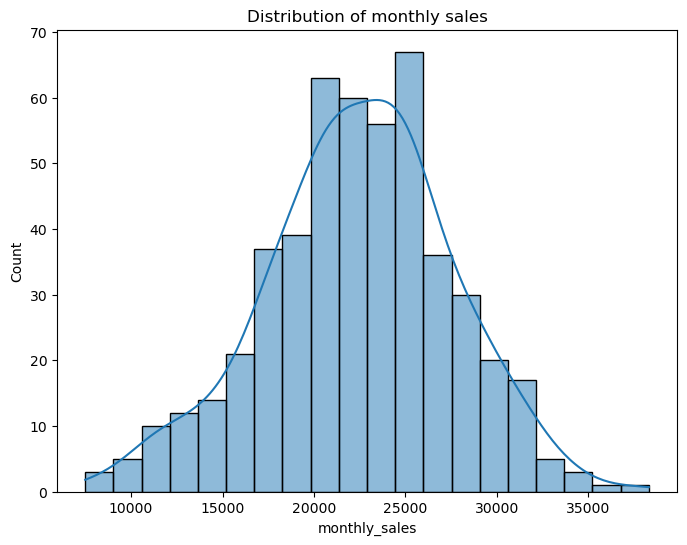

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(one_Sample["monthly_sales"],kde = True)
plt.title("Distribution of monthly sales")
plt.show()

The  bell curve (normal distruibution ) suggests that the data is symmetrically distributed around the mean

In [41]:
# One-Sample t-Test


In [42]:
# hypothesized mean
hypo_mean = 22000

# Extract the monthly sales Data
month_sales =  one_Sample["monthly_sales"]

# perform the one-sample-t-test
t_statistic,p_value = stats.ttest_1samp(month_sales, hypo_mean)

# Define alpha
alpha = 0.05

# Display the t-statistic and p-value
print("\nTwo_tailed test results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# determine of we reject the null hypothesis or not?

if p_value < alpha:
    print("Reject the null hypothesis: The average monthly sales is significantly different from $22,000.")
else:
    print("Fail to reject the null hypothesis: There is no enough difference  to say that the  average monthly is diffrent sales from  $22,000.")




Two_tailed test results:
T-Statistic: 1.9269971027222863
P-Value: 0.05454743294165254
Fail to reject the null hypothesis: There is no enough difference  to say that the  average monthly is diffrent sales from  $22,000.


# 2.  Independent Sample T-Test

load the dataset

In [43]:
ind_sample  = pd.read_csv(r"D:\downloads\retail_independent_ttest_dataset.csv")
ind_sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_location
0,7,1284.466734,725,506,20568.040633,11,Rural
1,15,1435.965854,1324,509,23637.098858,18,Rural
2,11,1593.272270,2765,500,11176.428748,33,Urban
3,8,1942.606865,1436,537,28693.108672,23,Urban
4,7,1757.297887,2806,468,17844.150571,23,Rural
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Rural
496,7,1549.935662,2838,498,20665.482229,32,Rural
497,13,1647.735379,2463,500,23683.745244,29,Urban
498,4,1586.750593,2649,528,20061.609082,20,Rural


Data Processing

In [44]:
ind_sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_location          0
dtype: int64

In [45]:
ind_sample.duplicated().sum()

0

In [46]:
ind_sample.shape

(500, 7)

In [47]:
ind_sample.describe()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.616000,1500.033666,1761.688000,499.588000,22442.763482,27.006000
std,5.662922,299.278880,713.102689,21.834003,5137.782731,12.525324
min,1.000000,690.934007,501.000000,438.000000,7492.381587,5.000000
25%,4.750000,1288.959528,1185.500000,483.000000,19378.585124,17.000000
50%,9.000000,1494.370598,1765.500000,500.000000,22570.226365,26.000000
75%,15.000000,1692.086499,2425.000000,515.000000,25626.600346,37.000000
max,19.000000,2423.664243,2977.000000,565.000000,38302.455403,49.000000


In [48]:
ind_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_location        500 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 27.5+ KB


In [49]:
ind_sample.head()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_location
0,7,1284.466734,725,506,20568.040633,11,Rural
1,15,1435.965854,1324,509,23637.098858,18,Rural
2,11,1593.272270,2765,500,11176.428748,33,Urban
3,8,1942.606865,1436,537,28693.108672,23,Urban
4,7,1757.297887,2806,468,17844.150571,23,Rural


EDA (Exploratary data Analysis)

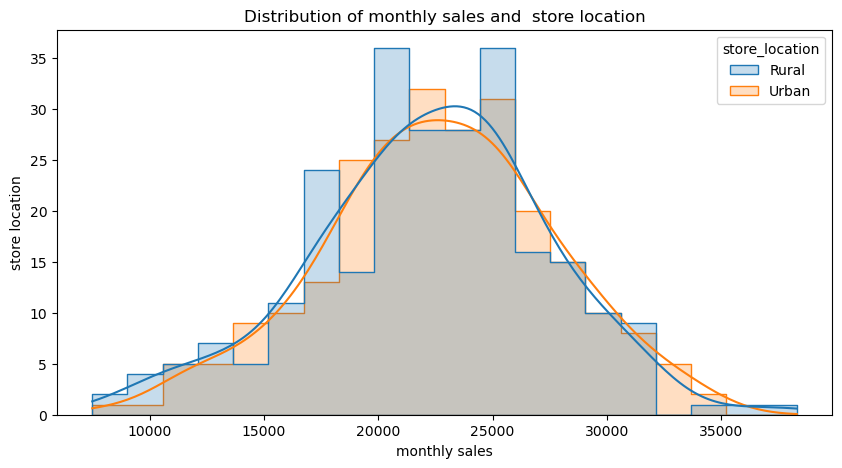

In [50]:
plt.figure(figsize =(10,5))
sns.histplot(data = ind_sample,x ="monthly_sales", hue ="store_location",kde = True,element = "step" )
plt.title("Distribution of monthly sales and  store location")
plt.xlabel("monthly sales")
plt.ylabel("store location")
plt.show()

In [51]:
# independent sample t test

In [52]:
# seprate data in two groups
urban_sales = ind_sample[ind_sample['store_location'] == 'Urban']['monthly_sales']
rural_sales = ind_sample[ind_sample['store_location'] == 'Rural']['monthly_sales']

#perform independent sample t test
t_stats1,p_value1 =stats.ttest_ind(urban_sales,rural_sales)

# print the test result
print("\nTwo_tailed test results:")
print("T_statistics:",t_stats1)
print("p_value:",p_value1)

# define alpha
alpha=0.05

# Determine if we reject the null hypothesis
if p_value < alpha:
    print(" We reject the null hypothesis. There is a significant difference in the monthly sales between urban and rural stores.")
else:
    print(" We fail to reject the null hypothesis. There is no significant difference in the monthly sales between urban and rural stores.")


Two_tailed test results:
T_statistics: 0.7723822331410712
p_value: 0.44025446821942793
 We fail to reject the null hypothesis. There is no significant difference in the monthly sales between urban and rural stores.


# 3. Pair Sample T-Test

load the dataset

In [53]:
pair_sample = pd.read_csv(r"D:\downloads\retail_paired_ttest_dataset.csv")
pair_sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales_before,monthly_sales_after,num_employees
0,7,1284.466734,725,506,18568.040633,30220.955444,49
1,15,1435.965854,1324,509,21637.098858,40609.484487,27
2,11,1593.272270,2765,500,9176.428748,23191.200558,9
3,8,1942.606865,1436,537,26693.108672,31076.607873,34
4,7,1757.297887,2806,468,15844.150571,23370.443436,10
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,28127.336710,20080.335584,8
496,7,1549.935662,2838,498,18665.482229,23640.898484,15
497,13,1647.735379,2463,500,21683.745244,22000.855617,36
498,4,1586.750593,2649,528,18061.609082,19168.810531,11


Data Processing

In [54]:
pair_sample.corr()

,store_id,store_area,items_available,daily_customer_count,monthly_sales_before,monthly_sales_after,num_employees
store_id,1.000000,-0.023099,0.000196,-0.022579,-0.006857,-0.007699,-0.009068
store_area,-0.023099,1.000000,-0.051489,0.032645,0.059209,-0.007224,0.060949
items_available,0.000196,-0.051489,1.000000,-0.058742,-0.043924,-0.030273,0.021111
daily_customer_count,-0.022579,0.032645,-0.058742,1.000000,0.032009,-0.008635,0.031994
monthly_sales_before,-0.006857,0.059209,-0.043924,0.032009,1.000000,-0.000261,-0.023435
monthly_sales_after,-0.007699,-0.007224,-0.030273,-0.008635,-0.000261,1.000000,0.027562
num_employees,-0.009068,0.060949,0.021111,0.031994,-0.023435,0.027562,1.000000


EDA (Exploratary data Analysis)

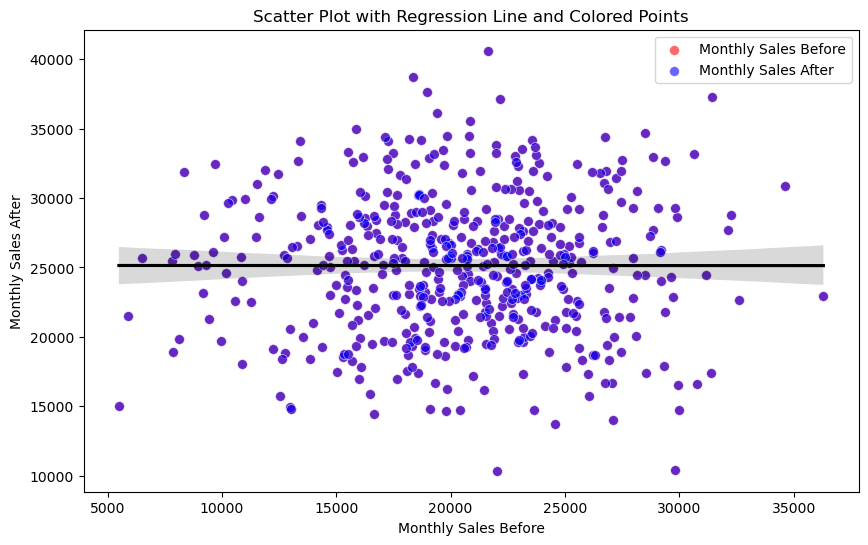

In [55]:

# Assuming pair_sample is a DataFrame with columns 'monthly_sales_before' and 'monthly_sales_after'

plt.figure(figsize=(10, 6))

# Scatter plot for 'monthly_sales_before' in red
sns.scatterplot(x='monthly_sales_before', y='monthly_sales_after', data=pair_sample, color='red', s=50, alpha=0.6, label='Monthly Sales Before')

# Scatter plot for 'monthly_sales_after' in blue
sns.scatterplot(x='monthly_sales_before', y='monthly_sales_after', data=pair_sample, color='blue', s=50, alpha=0.6, label='Monthly Sales After')

# Fit the regression line on the combined data
sns.regplot(x='monthly_sales_before', y='monthly_sales_after', data=pair_sample, scatter=False, color='black')

plt.xlabel('Monthly Sales Before')
plt.ylabel('Monthly Sales After')
plt.title('Scatter Plot with Regression Line and Colored Points')
plt.legend()
plt.show()


In [56]:
pair_sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales_before    0
monthly_sales_after     0
num_employees           0
dtype: int64

In [57]:
pair_sample.duplicated().sum()

0

In [58]:
pair_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,500.0,9.616000,5.662922,1.000000,4.750000,9.000000,15.000000,19.000000
store_area,500.0,1500.033666,299.278880,690.934007,1288.959528,1494.370598,1692.086499,2423.664243
items_available,500.0,1761.688000,713.102689,501.000000,1185.500000,1765.500000,2425.000000,2977.000000
daily_customer_count,500.0,499.588000,21.834003,438.000000,483.000000,500.000000,515.000000,565.000000
monthly_sales_before,500.0,20442.763482,5137.782731,5492.381587,17378.585124,20570.226365,23626.600346,36302.455403
monthly_sales_after,500.0,25135.386884,4948.120938,10355.243176,21680.707808,25376.293679,28357.496337,40609.484487
num_employees,500.0,26.780000,12.965794,5.000000,16.000000,26.000000,38.000000,49.000000


In [59]:
pair_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales_before  500 non-null    float64
 5   monthly_sales_after   500 non-null    float64
 6   num_employees         500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [60]:
# perform paired test
t_stats2,p_value2 =stats.ttest_rel(pair_sample["monthly_sales_before"],pair_sample["monthly_sales_after"])

# print the result
print("T-Statistics",{t_stats2})
print("p_Value",{p_value2})


# define alpha
alpha = 0.05

#determine if we rejected null hypothesise or  not ?
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in monthly sales before and after the marketing campaign.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in monthly sales before and after the marketing campaign.")


T-Statistics {-14.708472438334692}
p_Value {6.105558488766524e-41}
We fail to reject the null hypothesis. There is no significant difference in monthly sales before and after the marketing campaign.
